In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

----load the model-------
Train on 5 samples
Epoch 1/100
5/5 [==============================] - 1s 189ms/sample - loss: 0.6222 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.6139 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.6058 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.5978 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.5898 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.5820 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.5744 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.5668 - sparse_categorical_accuracy: 1.0000
Epoch 9/1

Epoch 70/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3005 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2982 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2960 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2937 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2915 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2894 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.2873 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 5ms/sample - loss: 0.2852 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
5/5 [==============================

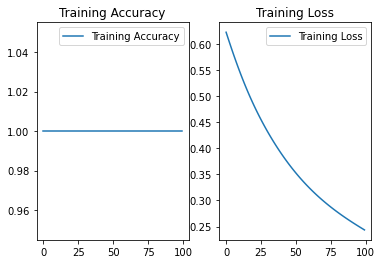

In [2]:
input_word = "abcde"
w_to_id = {
    "a":0,
    "b":1,
    "c":2,
    "d":3,
    "e":4
}
x_train = [
    w_to_id['a'],
    w_to_id['b'],
    w_to_id['c'],
    w_to_id['d'],
    w_to_id['e']
]
y_train = [
    w_to_id['b'],
    w_to_id['c'],
    w_to_id['d'],
    w_to_id['e'],
    w_to_id['a']
]


np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)

# 使x_train符合Embedding要求；【送入样本数，循环核时间展开步数】
# 此处整个数据集送入，展开维度为1
x_train = np.reshape(x_train,(len(x_train),1))
y_train = np.array(y_train)

model = tf.keras.Sequential([
    # 先对输入数据进行编码
    # 这一行会生成一个5行2列的可训练参数矩阵，实现编码可训练
    # 5个字母用2个数字表示
    Embedding(5,2),
    SimpleRNN(3),
    Dense(5,activation="softmax")
])

model.compile(optimizer=Adam(0.01),loss=SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "./checkpoint/rnn_embedding_1pre1.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print("----load the model-------")
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True,
                                                 monitor='loss')  

history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[cp_callback])
model.summary()

file = open('./weights.txt', 'w')  # 参数提取
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [3]:
preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    alphabet1 = input("input test alphabet:")
    # 把读到的输入字母直接查找表示他的id值
    alphabet = [w_to_id[alphabet1]]
    # 使alphabet符合Embedding输入要求：[送入样本数， 循环核时间展开步数]。
    # 此处验证效果送入了1个样本，送入样本数为1；输入1个字母出结果，循环核时间展开步数为1。
    alphabet = np.reshape(alphabet, (1, 1))
    result = model.predict(alphabet)
    pred = tf.argmax(result, axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of test alphabet:2
input test alphabet:a
a->b
input test alphabet:c
c->d
